# **성능관리**

## **1.환경준비**

### **(1) 라이브러리 로딩**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.backend import clear_session
from keras.optimizers import Adam
from keras.datasets import mnist

* 함수 만들기

In [32]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')
    plt.ylim(0, 2)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### **(2) 데이터로딩**

* 데이터 로딩
    * 과적합을 위한 예제 데이터입니다.
    * target
    * feature : 0 ~ 299

In [3]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/overfit_sample.csv"
data = pd.read_csv(path)
data.head()

,target,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,1,-1.067,-1.114,-0.616,0.376,1.090,0.467,-0.422,0.460,-0.443,...,0.220,-0.339,0.254,-0.179,0.352,0.125,0.347,0.436,0.958,-0.824
1,0,-0.831,0.271,1.716,1.096,1.731,-0.197,1.904,-0.265,0.557,...,-0.765,-0.735,-1.158,2.554,0.856,-1.506,0.462,-0.029,-1.932,-0.343
2,0,0.099,1.390,-0.732,-1.065,0.005,-0.081,-1.450,0.317,-0.624,...,-1.311,0.799,-1.001,1.544,0.575,-0.309,-0.339,-0.148,-0.646,0.725
3,1,-0.989,-0.916,-1.343,0.145,0.543,0.636,1.127,0.189,-0.118,...,-1.370,1.093,0.596,-0.589,-0.649,-0.163,-0.958,-1.081,0.805,3.401
4,0,0.811,-1.509,0.522,-0.360,-0.220,-0.959,0.334,-0.566,-0.656,...,-0.178,0.718,-1.017,1.249,-0.596,-0.445,1.751,1.442,-0.393,-0.643


## **2. Early Stopping**

### **(1) 데이터 준비**

In [4]:
# 데이터분할 : x, y
target = 'target'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

# 데이터분할 : train, validation
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

In [5]:
# 스케일링
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### **(2) 모델링**

In [6]:
# input_shape : feature 수 도출
nfeatures = x_train.shape[1]

# 메모리 정리
clear_session()

# Sequential 타입
model1 = Sequential( [Dense(128, input_shape = (nfeatures,), activation= 'relu'),
                      Dense(64, activation= 'relu'),
                      Dense(32, activation= 'relu'),
                      Dense(1, activation= 'sigmoid')] )

# 컴파일
model1.compile(optimizer= Adam(learning_rate = 0.001), loss='binary_crossentropy')

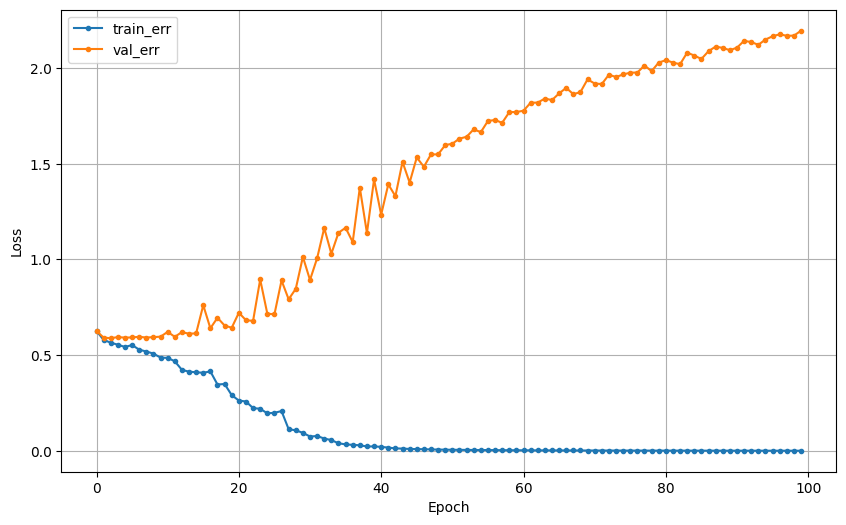

In [7]:
# 학습
hist = model1.fit(x_train, y_train, epochs = 100, validation_split=0.2, verbose = 0).history

# 학습결과 그래프
dl_history_plot(hist)

### **(3) 미리 멈춤!(Early Stopping)**

#### 1) 함수 불러오기

In [8]:
from keras.callbacks import EarlyStopping

#### 2) 모델링 with early stopping

Epoch 1/100
5/5 [==============================] - 2s 41ms/step - loss: 0.5726 - val_loss: 0.6022
Epoch 2/100
5/5 [==============================] - 0s 14ms/step - loss: 0.5627 - val_loss: 0.6018
Epoch 3/100
5/5 [==============================] - 0s 13ms/step - loss: 0.5521 - val_loss: 0.6023
Epoch 4/100
5/5 [==============================] - 0s 14ms/step - loss: 0.5326 - val_loss: 0.6067
Epoch 5/100
5/5 [==============================] - 0s 9ms/step - loss: 0.5269 - val_loss: 0.6053
Epoch 6/100
5/5 [==============================] - 0s 10ms/step - loss: 0.5072 - val_loss: 0.6074
Epoch 7/100
5/5 [==============================] - 0s 12ms/step - loss: 0.5047 - val_loss: 0.6230
Epoch 8/100
5/5 [==============================] - 0s 15ms/step - loss: 0.4835 - val_loss: 0.6110
Epoch 9/100
5/5 [==============================] - 0s 9ms/step - loss: 0.4601 - val_loss: 0.6191
Epoch 10/100
5/5 [==============================] - 0s 9ms/step - loss: 0.4375 - val_loss: 0.6187
Epoch 11/100
5/5 [====

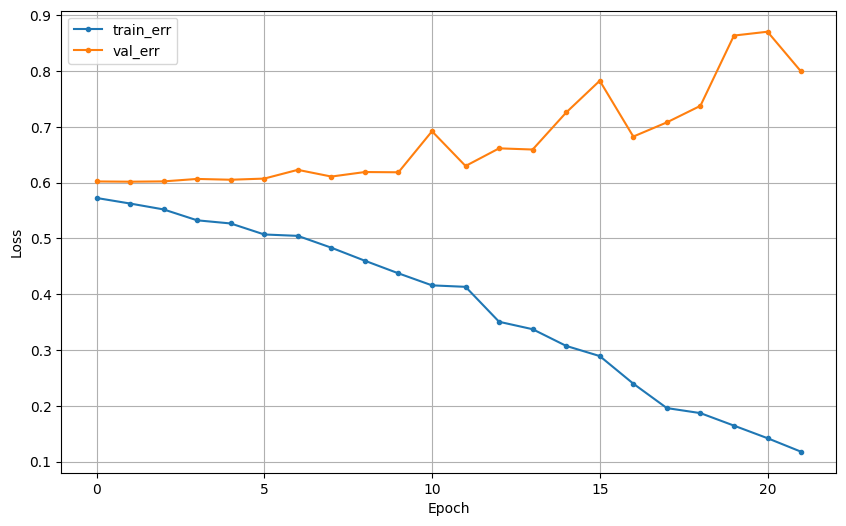

In [19]:
# 모델 선언
clear_session()

model2 = Sequential( [Dense(128, input_shape = (nfeatures,), activation= 'relu'),
                      Dense(64, activation= 'relu'),
                      Dense(32, activation= 'relu'),
                      Dense(1, activation= 'sigmoid')] )
model2.compile(optimizer= Adam(learning_rate = 0.001), loss='binary_crossentropy')

# EarlyStopping 설정 ------------
min_de = 0.0001
pat = 20

es = EarlyStopping(monitor = 'val_loss', min_delta = min_de, patience = pat)
# --------------------------------

# 학습
hist = model2.fit(x_train, y_train, epochs = 100, validation_split=0.2,
                  callbacks = [es]).history
dl_history_plot(hist)

## **3.가중치 규제(Regularization)**

In [20]:
# 규제를 위해 필요한 함수 불러오기
from keras.regularizers import l1, l2

### **(1) L1 규제**

In [26]:
# 메모리 정리
clear_session()

# Sequential 타입
model4 = Sequential( [Dense(128, input_shape = (nfeatures,), activation= 'relu',
                            kernel_regularizer = l1(0.01)),
                      Dense(64, activation= 'relu',
                            kernel_regularizer = l1(0.01)),
                      Dense(32, activation= 'relu',
                            kernel_regularizer = l1(0.01)),
                      Dense(1, activation= 'sigmoid')] )

# 컴파일
model4.compile(optimizer= Adam(learning_rate = 0.001), loss='binary_crossentropy')

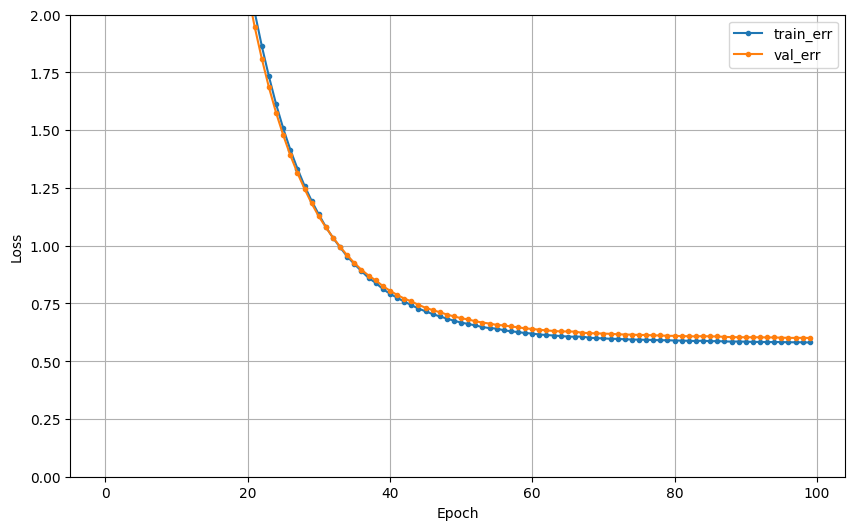

In [33]:
# 학습
hist = model4.fit(x_train, y_train, epochs = 100, validation_split=0.2, verbose = 0).history

# 학습결과 그래프
dl_history_plot(hist)

### **(2) L2 규제**

In [28]:
# 메모리 정리
clear_session()

# Sequential 타입
model5 = Sequential( [Dense(128, input_shape = (nfeatures,), activation= 'relu',
                            kernel_regularizer = l2(0.05)),
                      Dense(64, activation= 'relu',
                            kernel_regularizer = l2(0.05)),
                      Dense(32, activation= 'relu',
                            kernel_regularizer = l2(0.05)),
                      Dense(1, activation= 'sigmoid')] )

# 컴파일
model5.compile(optimizer= Adam(learning_rate = 0.001), loss='binary_crossentropy')

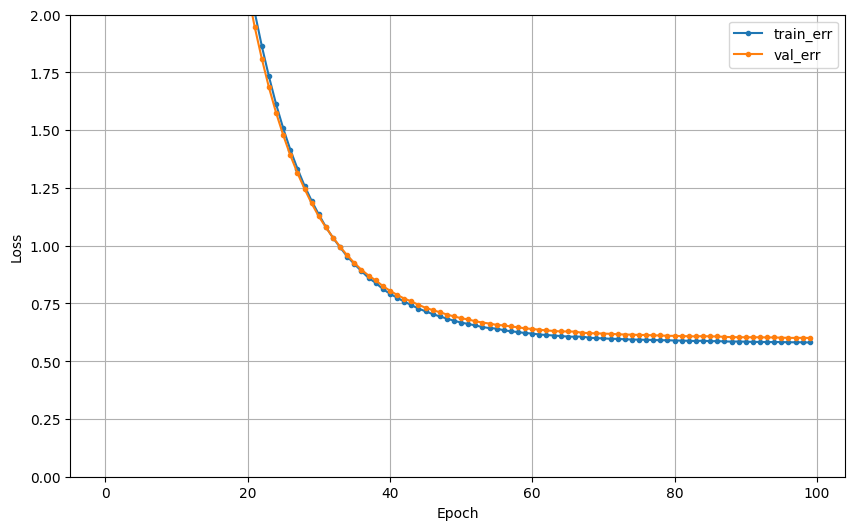

In [34]:
# 학습
hist = model5.fit(x_train, y_train, epochs = 100, validation_split=0.2, verbose = 0).history

# 학습결과 그래프
dl_history_plot(hist)

In [31]:
hist['val_loss']

[14.644978523254395,
 13.293869018554688,
 12.020720481872559,
 10.84939956665039,
 9.777507781982422,
 8.805879592895508,
 7.929470062255859,
 7.142127990722656,
 6.437211513519287,
 5.806307792663574,
 5.243089199066162,
 4.739346027374268,
 4.290993690490723,
 3.8930764198303223,
 3.5391108989715576,
 3.224393844604492,
 2.9448037147521973,
 2.694629669189453,
 2.4738059043884277,
 2.2774345874786377,
 2.1032767295837402,
 1.9468501806259155,
 1.809278130531311,
 1.6852458715438843,
 1.5760741233825684,
 1.4793612957000732,
 1.3920551538467407,
 1.3150827884674072,
 1.246453046798706,
 1.1831114292144775,
 1.1273778676986694,
 1.079296350479126,
 1.035481572151184,
 0.9957548379898071,
 0.9583532214164734,
 0.9253991842269897,
 0.8958145976066589,
 0.8709439039230347,
 0.8500527143478394,
 0.8257983922958374,
 0.8052532076835632,
 0.787321925163269,
 0.771490752696991,
 0.7590095400810242,
 0.7442879676818848,
 0.7315358519554138,
 0.7213055491447449,
 0.7122614979743958,
 0.7022531

## 4.[참조]Dropout

In [ ]:
from keras.layers import Dropout

### **(1) 적용 전**

In [ ]:
# input_shape : feature 수 도출
nfeatures = x_train.shape[1]

# 메모리 정리
clear_session()

# Sequential 타입
model1 = Sequential( [Dense(128, input_shape = (nfeatures,), activation= 'relu'),
                      Dense(64, activation= 'relu'),
                      Dense(32, activation= 'relu'),
                      Dense(1, activation= 'sigmoid')] )

# 컴파일
model1.compile(optimizer= Adam(learning_rate = 0.001), loss='binary_crossentropy')

In [ ]:
# 학습
hist = model1.fit(x_train, y_train, epochs = 100, validation_split=0.2, verbose = 0).history

# 학습결과 그래프
dl_history_plot(hist)

### **(2) 적용 후**

In [ ]:
# 메모리 정리
clear_session()

# Sequential 타입
model3 = Sequential( [Dense(128, input_shape = (nfeatures,), activation= 'relu'),
                      Dropout(0.4),
                      Dense(64, activation= 'relu'),
                      Dropout(0.4),
                      Dense(32, activation= 'relu'),
                      Dropout(0.4),
                      Dense(1, activation= 'sigmoid')] )

# 컴파일
model3.compile(optimizer= Adam(learning_rate = 0.001), loss='binary_crossentropy')

In [ ]:
# 학습
hist = model3.fit(x_train, y_train, epochs = 50, validation_split=0.2, verbose = 0).history

# 학습결과 그래프
dl_history_plot(hist)

## 5.모델 저장하기

### (1) 모델 저장하기

* model.save(‘파일이름.h5’)
    * 딥러닝 모델의 메소드로 .save가 제공됩니다.
    * 파일이름.h5 파일이 저장됩니다. (h5 파일 포맷 : 하둡파일 형식)

In [35]:
model1.save('hanky.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


* 저장된 파일은 왼쪽 '파일'탭에서 확인 가능
* 파일을 다운로드 받을 수 있다.

### (2) 모델 로딩하기

* load_model 함수는 별도로 불러와야 합니다.
* 경로를 맞춰주고 h5 파일을 읽어오면 그대로 사용 가능합니다.

In [36]:
from keras.models import load_model
model2 = load_model('hanky.h5')

* 불러온 모델 사용하기

In [37]:
pred2 = model2.predict(x_val)

2/2 [==============================] - 0s 9ms/step


In [38]:
pred2_1 = np.where(pred2 >0.5 , 1, 0)

In [39]:
print(accuracy_score(y_val,pred2_1))
print('-'*60)
print(confusion_matrix(y_val, pred2_1))
print('-'*60)
print(classification_report(y_val, pred2_1))

0.66
------------------------------------------------------------
[[32  3]
 [14  1]]
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.91      0.79        35
           1       0.25      0.07      0.11        15

    accuracy                           0.66        50
   macro avg       0.47      0.49      0.45        50
weighted avg       0.56      0.66      0.58        50



### (3) 중간 체크포인트에 모델 저장하기

* 폴더 정리 : 위에서 저장한 파일들 제거하기

In [45]:
import os

def delete_h5_files(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".h5"):
            file_path = os.path.join(directory, filename)
            try:
                os.remove(file_path)
                print(f"Deleted: {file_path}")
            except Exception as e:
                print(f"Error deleting {file_path}: {e}")

# 삭제할 디렉토리 지정
directory_to_delete_from = "/content/"

# 확장자가 .h5인 파일 삭제
delete_h5_files(directory_to_delete_from)


Deleted: /content/040.h5
Deleted: /content/014.h5
Deleted: /content/007.h5
Deleted: /content/008.h5
Deleted: /content/012.h5
Deleted: /content/021.h5
Deleted: /content/003.h5
Deleted: /content/001.h5
Deleted: /content/019.h5
Deleted: /content/004.h5
Deleted: /content/010.h5
Deleted: /content/017.h5
Deleted: /content/018.h5
Deleted: /content/002.h5
Deleted: /content/016.h5
Deleted: /content/013.h5
Deleted: /content/038.h5
Deleted: /content/015.h5
Deleted: /content/005.h5
Deleted: /content/011.h5
Deleted: /content/044.h5
Deleted: /content/020.h5
Deleted: /content/006.h5
Deleted: /content/009.h5
Deleted: /content/046.h5


#### 1) 체크포인트 함수 불러오기

In [41]:
from keras.callbacks import ModelCheckpoint

#### 2) 모델링 체크포인트 저장

* 모델 선언

In [42]:
# input_shape : feature 수 도출
nfeatures = x_train.shape[1]

# 메모리 정리
clear_session()

# Sequential 타입
model1 = Sequential( [Dense(64, input_shape = (nfeatures,), activation= 'relu'),
                      Dense(32, activation= 'relu'),
                      Dense(16, activation= 'relu'),
                      Dense(1, activation= 'sigmoid')] )

# 컴파일
model1.compile(optimizer= Adam(learning_rate = 0.0001), loss='binary_crossentropy')

* 체크포인트 저장
    * 아래 코드에서 ModelCheckpoint 콜백은 검증 데이터의 정확도(val_accuracy)를 기준으로 모델 저장
    * 모델의 성능이 이전에 저장된 모델보다 향상될 때만 저장되도록 save_best_only=True로 설정
    * 또한, verbose=1로 설정하면 모델이 저장될 때마다 콘솔에 메시지가 표시됨.

In [43]:
cp_path = '/content/{epoch:03d}.h5'
mcp = ModelCheckpoint(cp_path, monitor='val_loss', verbose = 1, save_best_only=True)

# 학습
hist = model1.fit(x_train, y_train, epochs = 50, validation_split=.2, callbacks=[mcp]).history

Epoch 1/50
1/5 [=====>........................] - ETA: 4s - loss: 0.8556
Epoch 1: val_loss improved from inf to 0.76785, saving model to /content/001.h5
5/5 [==============================] - 1s 52ms/step - loss: 0.8091 - val_loss: 0.7679
Epoch 2/50
1/5 [=====>........................] - ETA: 0s - loss: 0.7519
Epoch 2: val_loss improved from 0.76785 to 0.72633, saving model to /content/002.h5
5/5 [==============================] - 0s 14ms/step - loss: 0.7578 - val_loss: 0.7263
Epoch 3/50
1/5 [=====>........................] - ETA: 0s - loss: 0.7166
Epoch 3: val_loss improved from 0.72633 to 0.69021, saving model to /content/003.h5
5/5 [==============================] - 0s 15ms/step - loss: 0.7166 - val_loss: 0.6902
Epoch 4/50
1/5 [=====>........................] - ETA: 0s - loss: 0.7022

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: val_loss improved from 0.69021 to 0.66274, saving model to /content/004.h5
5/5 [==============================] - 0s 19ms/step - loss: 0.6831 - val_loss: 0.6627
Epoch 5/50
1/5 [=====>........................] - ETA: 0s - loss: 0.6782
Epoch 5: val_loss improved from 0.66274 to 0.64407, saving model to /content/005.h5
5/5 [==============================] - 0s 16ms/step - loss: 0.6562 - val_loss: 0.6441
Epoch 6/50
1/5 [=====>........................] - ETA: 0s - loss: 0.6417
Epoch 6: val_loss improved from 0.64407 to 0.63266, saving model to /content/006.h5
5/5 [==============================] - 0s 15ms/step - loss: 0.6393 - val_loss: 0.6327
Epoch 7/50
1/5 [=====>........................] - ETA: 0s - loss: 0.6831
Epoch 7: val_loss improved from 0.63266 to 0.62348, saving model to /content/007.h5
5/5 [==============================] - 0s 16ms/step - loss: 0.6239 - val_loss: 0.6235
Epoch 8/50
1/5 [=====>........................] - ETA: 0s - loss: 0.6289
Epoch 8: val_loss improved 

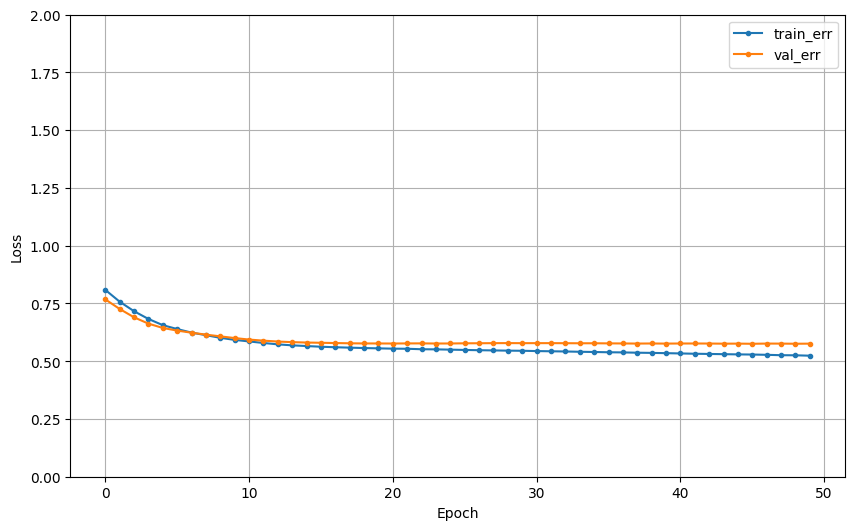

In [44]:
# 학습결과 그래프
dl_history_plot(hist)